# Energize Your Stock Clustering

In this activity, you’ll use the K-means algorithm and clustering optimization techniques to cluster stocks. The purpose will be to define a portfolio investment strategy.

Instructions

1. Read in the `tsx-energy-2018.csv` file from the `Resources` folder and create the DataFrame. Make sure to set the `Ticker` column as the DataFrame’s index. Then review the DataFrame.

    > **Note:** This step has been completed for you. Be sure to run these cells before moving on to Step 3. 

2. Review the four code cells that are included in this step in the notebook. These cells contain the code that scales the `df_stocks` DataFrame and creates a new DataFrame that contains the scaled data. 

    > **Note:** This step has been completed for you. Be sure to run these cells before moving on to Step 3. 

3. Using the `df_stocks_scaled` DataFrame, cluster the data by using the K-means algorithm and a lowercase-k value of  3. Add the resulting list of company segment values as a new column in the `df_stocks_scaled` DataFrame. 

    > **Rewind** You can use a lowercase-k value of 3 to start, or you can use the elbow method to find the optimal value for lowercase-k.

4. Using hvPlot, create a scatter plot to visualize the clusters setting `x="AnnualVariance"`,  `y="Annual Return"`, and `by="StockCluster"`. Be sure to style and format your plot.

    > **Rewind** Remember that you can style your plot using hvPlot’s customization parameters. For example, you can add the ticker symbol to the tooltip of each point by using hvPlot’s `hover_cols` parameter. For a refresher on customizing `hvplot`, refer to [Customization](https://hvplot.holoviz.org/user_guide/Customization.html) in the hvPlot user guide.

5. To get another perspective on the clusters, reduce the number of features to two principal components by using PCA. Make sure to do the following: 

    - Use the `df_stocks_scaled` DataFrame to complete this analysis. 

    - Review the PCA data. 

    - Calculate the explained variance ratio that results from the PCA data. 
    

6. Using the PCA data calculated in the previous step, create a new DataFrame called `df_stocks_pca`. Make sure to do the following: 

    - Add an additional column to the DataFrame that contains the tickers from the original `df_stocks` DataFrame. 

    - Set the new Tickers column as the index. 

    - Review the DataFrame.
    

7. Rerun the K-means algorithm with the new principal-components data, and then create a scatter plot by using the two principal components for the x and y axes, and by using `StockCluster`. Be sure to style and format your plot.


8. **Optional Challenge:** Find the best `k` with `PCA`.
 
 * Code the elbow method algorithm and use the PCA data to find the best value for k. Use a range from 1 to 11.

 * Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

 * Answer the following question: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?


References

[scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[scikit-learn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[scikit-learn Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)

[scikit-learn Python Library](https://scikit-learn.org)

[HvPlot Customization](https://hvplot.holoviz.org/user_guide/Customization.html)

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from path import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step 1: Read in the `tsx-energy-2018.csv` file from the `Resources` folder and create the DataFrame. Make sure to set the `Ticker` column as the DataFrame’s index. Then review the DataFrame.

    > **Note:** This step has been completed for you. Be sure to run these cells before moving on to Step 3.

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_stocks = pd.read_csv(
    Path("../Resources/tsx-energy-2018.csv"),                
    index_col="Ticker"
)

# Review the DataFrame
df_stocks.head()

,CompanyName,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,EnergyType
Ticker,,,,,,,,,
ARX,ARC Resources Ltd.,13.14,13.34,12.91,13.10,1479913.38,-0.7275,0.3590,Oil
CCO,Cameco Corporation,13.70,13.92,13.50,13.70,1203788.22,0.2014,0.3693,Other Energy
CNQ,Canadian Natural Resources Limited,41.97,42.46,41.46,41.91,3218248.68,-0.3461,0.2947,Oil
CVE,Cenovus Energy Inc.,11.96,12.18,11.75,11.95,4566143.56,-0.3219,0.4500,Oil
CPG,Crescent Point Energy Corp.,8.53,8.67,8.36,8.50,3919414.03,-1.0103,0.4597,Other Energy


In [3]:
df_stocks.shape

(24, 9)

## Step 2: Review the four code cells that are included in this step in the notebook. These cells contain the code that scales the `df_stocks` DataFrame and creates a new DataFrame that contains the scaled data. 

    > **Note:** This step has been completed for you. Be sure to run these cells before moving on to Step 3. 


In [4]:
# Scale price data, return, and variance values
stock_data_scaled = StandardScaler().fit_transform(
    df_stocks[["MeanOpen", "MeanHigh", "MeanLow", "MeanClose", "MeanVolume", "AnnualReturn", "AnnualVariance"]]
)

In [5]:
# Create a DataFrame with the scaled data
df_stocks_scaled = pd.DataFrame(
    stock_data_scaled,
    columns=["MeanOpen", "MeanHigh", "MeanLow", "MeanClose", "MeanVolume", "AnnualReturn", "AnnualVariance"]
)

# Copy the tickers names from the original data
df_stocks_scaled["Ticker"] = df_stocks.index

# Set the Ticker column as index
df_stocks_scaled = df_stocks_scaled.set_index("Ticker")

# Display sample data
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance
Ticker,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424


In [6]:
# Encode (convert to dummy variables) the `EnergyType` column, which categorizes oil versus non-oil firms
oil_dummies = pd.get_dummies(df_stocks["EnergyType"]).astype(int)
oil_dummies.head()

,Oil,Other Energy
Ticker,,
ARX,1,0
CCO,0,1
CNQ,1,0
CVE,1,0
CPG,0,1


In [7]:
# Concatenate the `EnergyType` encoded dummies with the scaled data DataFrame
df_stocks_scaled = pd.concat([df_stocks_scaled, oil_dummies], axis=1)

# Display the sample data
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy
Ticker,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,0
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,1
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,0
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1


## Step 3: Using the `df_stocks_scaled` DataFrame, cluster the data by using the K-means algorithm and a lowercase-k value of  3. Add the resulting list of company segment values as a new column in the `df_stocks_scaled` DataFrame. 

> **Rewind** You can use a lowercase-k value of 3 to start, or you can use the elbow method to find the optimal value for lowercase-k.

In [8]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

In [9]:
# Fit the model for the df_stocks_scaled DataFrame
model.fit(df_stocks_scaled)

KMeans(n_clusters=3)

In [10]:
# Predict the model segments (clusters)
stock_clusters = model.predict(df_stocks_scaled)

# View the stock segments
print(stock_clusters)

[2 0 1 2 2 1 2 0 0 1 0 0 2 0 2 0 1 0 2 1 1 1 1 2]


In [11]:
# Create a new column in the DataFrame with the predicted clusters
df_stocks_scaled["StockCluster"] = stock_clusters

# Review the DataFrame
df_stocks_scaled.head()

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy,StockCluster
Ticker,,,,,,,,,,
ARX,-0.916832,-0.917217,-0.918045,-0.918135,-0.152786,-1.332445,0.460854,1,0,2
CCO,-0.880152,-0.879472,-0.879062,-0.878786,-0.379117,1.695742,0.559411,0,1,0
CNQ,0.971524,0.977848,0.968315,0.971255,1.272074,-0.089092,-0.154415,1,0,1
CVE,-0.994122,-0.992707,-0.994689,-0.993553,2.376902,-0.010201,1.331607,1,0,2
CPG,-1.218785,-1.221130,-1.218673,-1.219807,1.846798,-2.254365,1.424424,0,1,2


## Step 4: Using hvPlot, create a scatter plot to visualize the clusters setting `x="AnnualVariance"`,  `y="Annual Return"`, and `by="StockCluster"`. Be sure to style and format your plot.

In [12]:
# Create a scatter plot with x="AnnualVariance:,  y="AnnualReturn"
df_stocks_scaled.hvplot.scatter(
    x="AnnualVariance",
    y="AnnualReturn",
    by="StockCluster",
    hover_cols = ["Ticker"], 
    title = "Scatter Plot by Stock Segment - k=3"
)

:NdOverlay   [StockCluster]
   :Scatter   [AnnualVariance]   (AnnualReturn,Ticker)

## Step 5: To get another perspective on the clusters, reduce the number of features to two principal components by using PCA. Make sure to do the following: 

 * Use the `df_stocks_scaled` DataFrame to complete this analysis. 

 * Review the PCA data. 

 * Calculate the explained variance ratio that results from the PCA data. 


In [13]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [14]:
# Fit the df_stocks_scaled data to the PCA
stocks_pca_data = pca.fit_transform(df_stocks_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
stocks_pca_data[:5]

array([[-2.15071197, -0.79045141],
       [-1.42411001,  1.94834268],
       [ 1.79884562, -1.46769127],
       [-2.46812832, -1.99622052],
       [-3.22909961, -2.05607094]])

In [15]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.58557714, 0.19777544])

## Step 6: Using the PCA data calculated in the previous step, create a new DataFrame called `df_stocks_pca`. Make sure to do the following: 

* Add an additional column to the DataFrame that contains the tickers from the original `df_stocks` DataFrame. 

* Set the new Tickers column as the index. 

* Review the DataFrame.


In [16]:
# Creating a DataFrame with the PCA data
df_stocks_pca = pd.DataFrame(stocks_pca_data, columns=["PC1", "PC2"])

# Copy the tickers names from the original data
df_stocks_pca["Ticker"] = df_stocks.index

# Set the Ticker column as index
df_stocks_pca = df_stocks_pca.set_index("Ticker")

# Review the DataFrame
df_stocks_pca.head()

,PC1,PC2
Ticker,,
ARX,-2.150712,-0.790451
CCO,-1.424110,1.948343
CNQ,1.798846,-1.467691
CVE,-2.468128,-1.996221
CPG,-3.229100,-2.056071


In [26]:
import numpy as np
# Get the absolute values of the PCA components
pca_components_abs = np.abs(pca.components_)

# Create a DataFrame to represent the weights of each original feature in the principal components
pca_weights_df = pd.DataFrame(pca_components_abs, columns=df_stocks_scaled.columns, index=['PC1', 'PC2'])

# Display the DataFrame showing the weights of each original feature in the principal components
pca_weights_df

,MeanOpen,MeanHigh,MeanLow,MeanClose,MeanVolume,AnnualReturn,AnnualVariance,Oil,Other Energy,StockCluster
PC1,0.450125,0.450027,0.450267,0.450187,0.008848,0.132245,0.382046,0.013395,0.013395,0.159909
PC2,0.122677,0.123149,0.121741,0.122031,0.623679,0.406169,0.232470,0.216026,0.216026,0.488617


In [27]:
# Assuming pca_weights_df is your DataFrame containing weights
heatmap = pca_weights_df.hvplot.heatmap(
    xlabel='Features', 
    ylabel='Principal Components',
    title='Weights of Original Features in Principal Components',
    cmap='coolwarm',
    width=700,
    height=500
)

heatmap

:HeatMap   [columns,index]   (value)

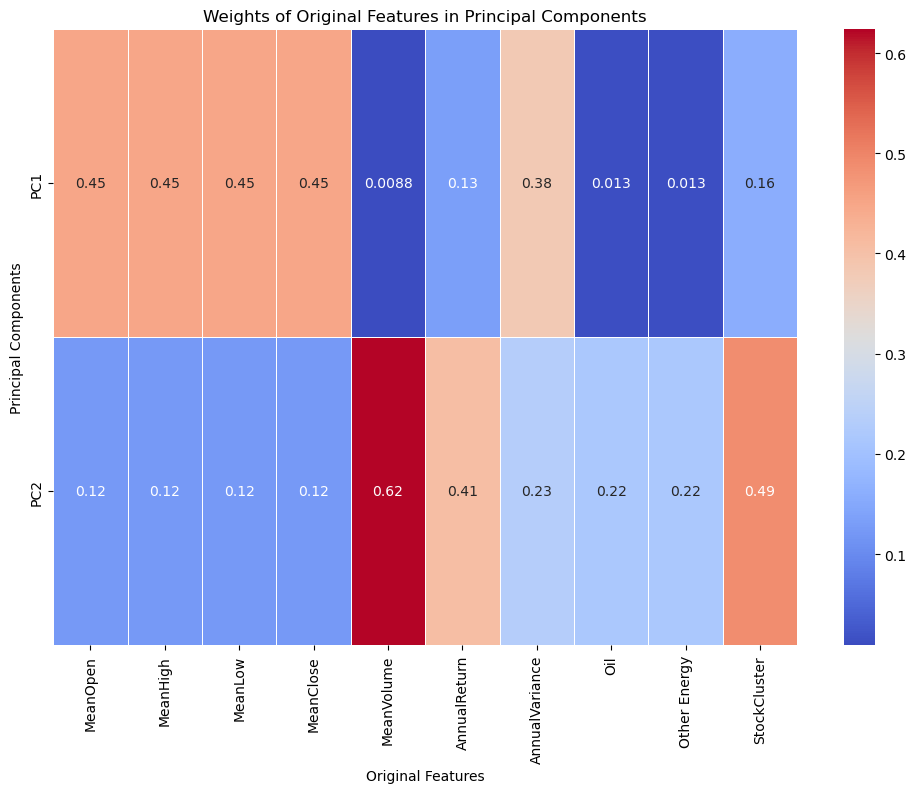

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the heatmap
# sns.set(style="whitegrid")

# Create a heatmap of the PCA weights
plt.figure(figsize=(12, 8))
sns.heatmap(pca_weights_df, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Weights of Original Features in Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

## Step 7: Rerun the K-means algorithm with the new principal-components data, and then create a scatter plot by using the two principal components for the x and y axes, and by using `StockCluster`. Be sure to style and format your plot.

* Question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?


In [18]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_stocks_pca)

# Predict the model segments (clusters)
stock_clusters = model.predict(df_stocks_pca)

# View the stock segments
print(stock_clusters)

[2 0 1 2 2 1 2 0 0 1 0 0 2 0 2 0 1 0 2 1 1 1 1 2]


In [19]:
# Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_stocks_pca_predictions = df_stocks_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_stocks_pca_predictions["StockCluster"] = stock_clusters

# Review the DataFrame
df_stocks_pca_predictions.head()

,PC1,PC2,StockCluster
Ticker,,,
ARX,-2.150712,-0.790451,2
CCO,-1.424110,1.948343,0
CNQ,1.798846,-1.467691,1
CVE,-2.468128,-1.996221,2
CPG,-3.229100,-2.056071,2


In [20]:
# Create the scatter plot with x="PC1" and y="PC2"
df_stocks_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="StockCluster",
    title = "Scatter Plot by Stock Segment - PCA=2"
)

:NdOverlay   [StockCluster]
   :Scatter   [PC1]   (PC2)


**Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

**Answer:** We can conclude that we can use less features and get a similar performance to the original model since we can clearly identify three clusters.

### Optional Challenge: Find the best `k` with `PCA`

In this section, you will use the elbow method to find the best value for k using the PCA data.

* Code the elbow method algorithm and use the PCA data to find the best value for k. Use a range from 1 to 11.

* Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

* Answer the following question: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

In [21]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

In [22]:
# Create an empy list to store the inertia values
inertia = []

In [23]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_stocks_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_stocks_pca)
    inertia.append(model.inertia_)

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

**Question:** What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

**Answer:** Based on this Elbow Curve, it looks like `k=3` is still the correct one.